# Работа №1. Нежесткие системы ОДУ. 

## Задача  
Изучите поведение численного решения ОДУ второго порядка (уравнения Ван-дер-Поля):

$y'' + e(y^2-1)y' + y = 0$

представленного в виде системы двуъ ОДУ первого порядка:

$y_{1}(t)' = y_{2}(t)$

$y_{2}(t)' = e(1-y_{1}^2)y_{2}-y_{1}$, $e = 5$

1. $y_{1}(0) = 2$
2. $y_{2}(0) = 0$
3. $0 < t < T$, $T = 101$

Решить методами второго порядка и выше: 
1) Метод Рунге-Кутта явный
2) Метод Адамса
3) Метод ФДН

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as op

Начальные данные и правая часть: 

In [36]:
y0 = np.array([2, 0])

def f(t, y):
    return np.array([y[1], 5 * (1 - y[0]*y[0]) * y[1] - y[0]])

## 1. Метод Рунге-Кутта
Будем использовать метод Хойна третьего порядка апроксимации.
|         |     |         |         |         |
|---------|-----|---------|---------|---------|
| $c_{1}$ | 0   | 0       | 0       | 0       |
| $c_{2}$ | 1/3 | 1/3     | 0       | 0       |
| $c_{3}$ | 2/3 | 0       | 2/3     | 0       |
|         |     | 1/4     | 0       | 3/4     |
|         |     | $b_{1}$ | $b_{2}$ | $b_{3}$ |

#### Функция метода: 

In [37]:
def rungekutta_iter(y, t, tau, idx):
    k1 = tau * f(t[idx], y[idx])
    k2 = tau * f(t[idx] + tau/2, y[idx] + k1/2)
    k3 = tau * f(t[idx] + tau, y[idx] - k1 + 2 * k2)
    return y[idx] + (k1 + 4 * k2 + k3) / 6

def rungekutta(y0, tau, T):
    t = np.arange(0, T, tau)
    n = int(T/tau)
    y = np.zeros((n, len(y0)))
    
    y[0] = y0

    for idx in range(n-1):
        y[idx+1] = rungekutta_iter(y, t, tau, idx)

    return t, y

#### Решение с $\tau = 0.01, T = 100$

In [38]:
t_r, y_r = rungekutta(y0, 0.01, 100) 

### Построение графиков:

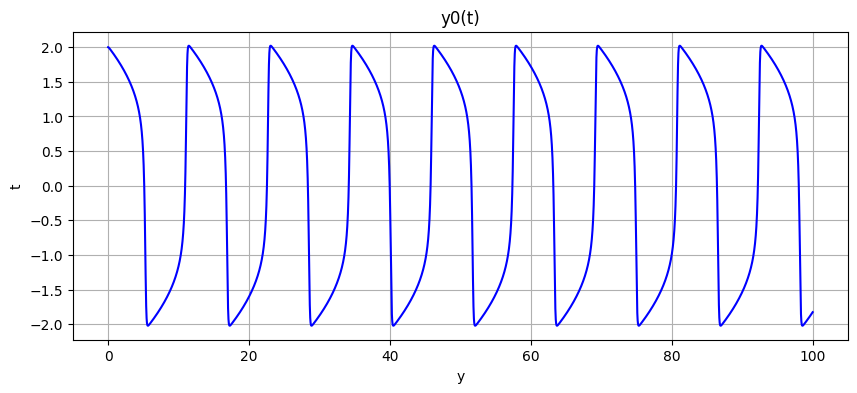

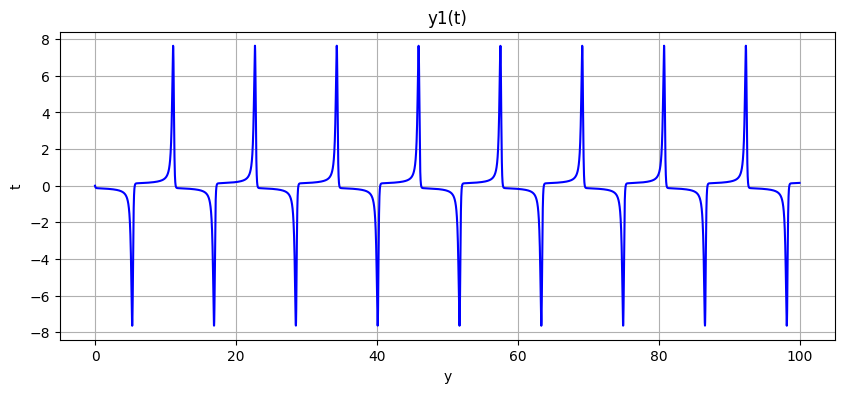

In [39]:
def graph(t, y, ind, filename):
    
    plt.figure(figsize=[10, 4])
    plt.plot(t[:len(y)], y[:,ind], 'b-')
    
    plt.title(f"y{ind}(t)")
    plt.grid()
    plt.xlabel('y')
    plt.ylabel('t')

    plt.savefig(filename)

graph(t_r, y_r, 0, 'pictures/rk_y1.png')
graph(t_r, y_r, 1, 'pictures/rk_y2.png')

<img src='pictures/rk_y1.png'>
<img src='pictures/rk_y2.png'>

### Фазовые диаграммы:

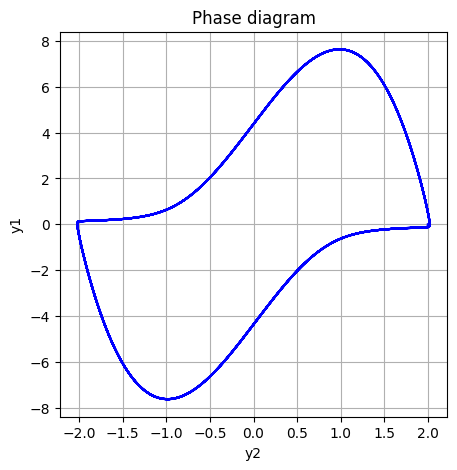

In [40]:
def phase_diag(t, y, filename):
    
    plt.figure(figsize=[5, 5])
    
    plt.plot(y[:,0], y[:,1], 'b-')
    
    plt.title("Phase diagram")
    plt.grid()
    plt.xlabel('y2')
    plt.ylabel('y1')
    
    plt.savefig(filename)

phase_diag(t_r, y_r, 'pictures/rk_phase.png')

<img src='pictures/rk_phase.png'>

### Исследование поведения в зависимости от шага:

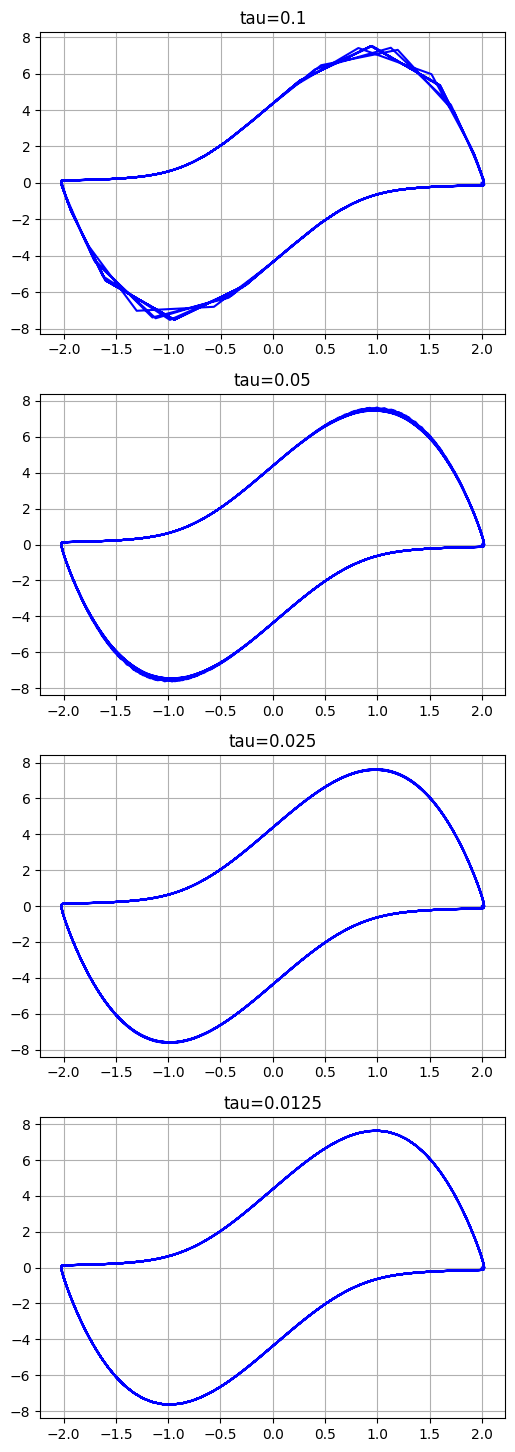

In [41]:
steps = [0.1, 0.05, 0.025, 0.0125]
res = [rungekutta(y0, tau, 100) for tau in steps]

fig, axs = plt.subplots(4, figsize=[6, 18])

ind = 0
for ax in axs.flat:
    ax.plot(res[ind][1][:,0], res[ind][1][:,1], 'b-')
    
    ax.set_title(f"tau={steps[ind]}")
    ax.grid()
    ind += 1

plt.savefig('pictures/rk_steps.png')

<img src='pictures/rk_steps.png'>

## 2. Метод Aдамса
Используем явный метод третьего порядка аппроксимации:
#### $u^{n+1}= u^n + \tau * (\frac{55}{24}f^n - \frac{59}{24}f^{n-1} + \frac{37}{24}f^{n-2} - \frac{9}{24}f^{n-3})$

#### Функция метода: 

In [42]:
def adams(y0, tau, T):
    t = np.arange(0, T, tau)
    n = int(T/tau)
    y = np.zeros((n, len(y0)))
    
    y[0] = y0
    y[1] = rungekutta_iter(y, t, tau, 0)
    y[2] = rungekutta_iter(y, t, tau, 1)
    y[3] = rungekutta_iter(y, t, tau, 2)
    
    for idx in range(3, n-1):
        f_n   = f(t[idx], y[idx])
        f_n_1 = f(t[idx-1], y[idx-1])
        f_n_2 = f(t[idx-2], y[idx-2])
        f_n_3 = f(t[idx-3], y[idx-3])
        y[idx+1] = y[idx] + tau * (55*f_n - 59*f_n_1 + 37*f_n_2 - 9*f_n_3) / 24

    return t, y

### Построение графиков и фазовой диаграммы

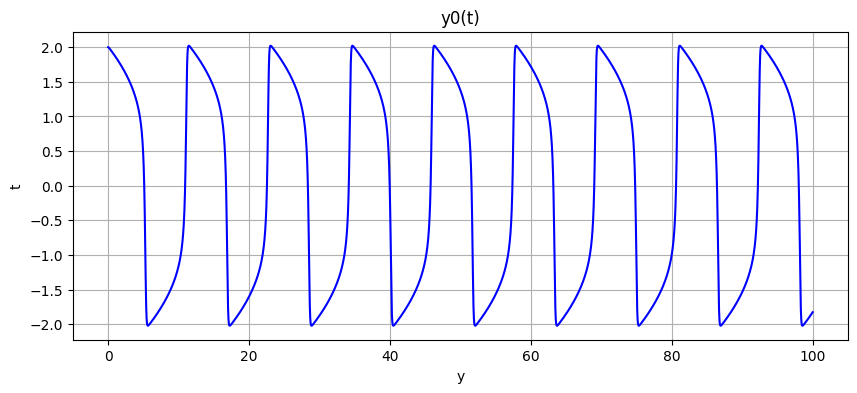

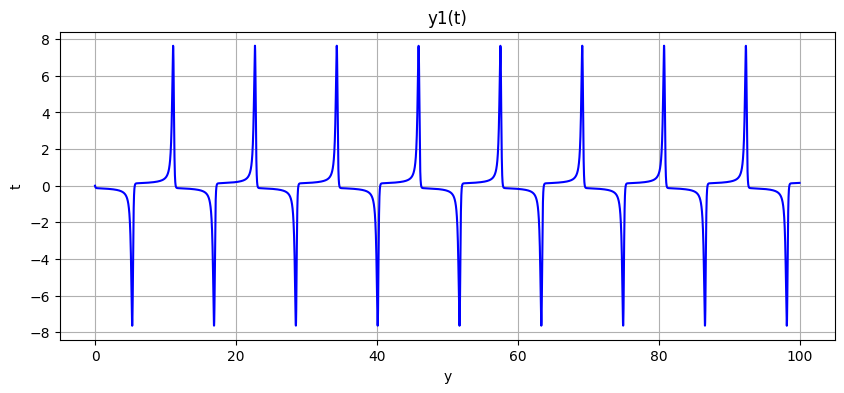

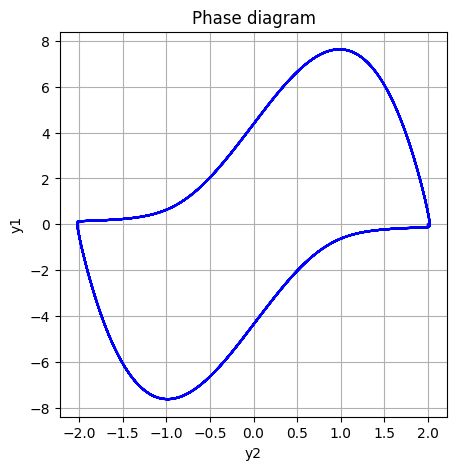

In [43]:
t_a, y_a = adams(y0, 0.01, 100)

graph(t_a, y_a, 0, 'pictures/adams_y1.png')
graph(t_a, y_a, 1, 'pictures/adams_y2.png')

phase_diag(t_a, y_a, 'pictures/adams_phase.png')

<img src='pictures/adams_y1.png'>

<img src='pictures/adams_y2.png'>

<img src='pictures/adams_phase.png'>

### Исследование поведения в зависимости от шага:

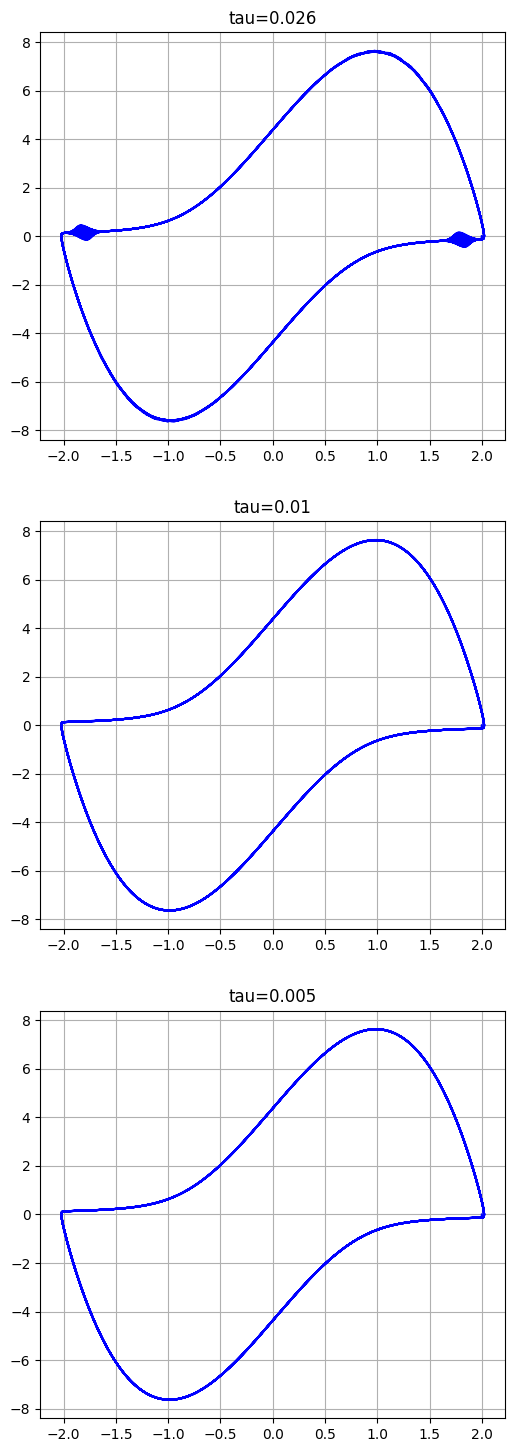

In [49]:
steps = [0.026, 0.01, 0.005]
res = [adams(y0, tau, 100) for tau in steps]

fig, axs = plt.subplots(3, figsize=[6, 18])

ind = 0
for ax in axs.flat:
    ax.plot(res[ind][1][:,0], res[ind][1][:,1], 'b-')
    
    ax.set_title(f"tau={steps[ind]}")
    ax.grid()
    ind += 1

plt.savefig('pictures/adams_steps.png')

<img src='pictures/adams_steps.png'>

### 3. ФДН
#### $u^{n+1} + \sum_{j=1}^{k} {a_{j}u^{n+1-j}} = \tau \beta f^{n+1} $

Будем использовать Метод Гира третьего порядка аппроксимации.

|       |       |        |        |        |
|-------|-------|--------|--------|--------|
| **k** | **b** | **a0** | **a1** | **a2** |
| 4     |  6/11 | -2/11  |  9/11  | -18/11 |


#### Решение системы нелинейных методом Ньютона

$ y^{n+1}_{1} + \sum ... = \tau\beta * y^{n+1}_{2}$

$ y^{n+1}_{2} + \sum ... = \tau\beta * 5(1 - (y^{n+1}_{1})^2)y^{n+1}_{2} - y^{n+1}_{1}$

Опустим индекс n+1 для простоты. 

$ y_{1} + C_{1} = \tau\beta * y_{2}$

$ y_{2} + C_{2} = \tau\beta * 5(1 - y^2_{1})y_{2} - y_{1}$

In [45]:
def F(y, C, tau, b):
    """
    [y1 - C1 - tau * b * y2, 
     y2 - C2 - tau * b * (5 * (1 - y1*y1)*y2 - y1)]
    """
    return [y[0] + C[0] - tau * b * y[1], 
            y[1] + C[1] - tau * b * ( 5 * (1 - y[0]*y[0]) * y[1] - y[0])]

def J(y, tau, b):
    """
    Jacoby matrix of the system
    """
    j = np.zeros((2,2))

    j[0][0] = +1.0
    j[0][1] = -tau * b
    j[1][0] = -1.0 + 10 * tau * b * y[0]
    j[1][1] = +1.0 - 5 * tau * b * (1 - y[0] * y[0])
    
    return j

def y1_next_iteration_sim(y, C, tau, b):
    return tau * b * y[1] - C[0]

def y2_next_iteration_sim(y, C, tau, b):
    return 5 * tau * b * (1 - y[0]*y[0]) * y[1] - y[0] - C[1]

def y1_next_iteration_newton(y, C, tau, b):
    j = J(y, tau, b)
    return y[0] - (np.linalg.inv(j) @ F(y, C, tau, b))[0]

def y2_next_iteration_newton(y, C, tau, b):
    j = J(y, tau, b)
    return y[1] - (np.linalg.inv(j) @ F(y, C, tau, b))[1]

def iterate(y0, y1_next_iteration, y2_next_iteration, C, tau, b):
    """
    Make iterations until desired presicion is achieved.
    """
    prev_y1 = y0[0]
    prev_y2 = y0[1]
    
    next_y1 = y1_next_iteration([prev_y1, prev_y2], C, tau, b)
    next_y2 = y2_next_iteration([prev_y1, prev_y2], C, tau, b)

    
    while abs(next_y1 - prev_y1) > 1E-4 or abs(next_y2 - prev_y2) > 1E-4:
    
        prev_y1 = next_y1
        prev_y2 = next_y2
        
        next_y1 = y1_next_iteration([prev_y1, prev_y2], C, tau, b)
        next_y2 = y2_next_iteration([prev_y1, prev_y2], C, tau, b)
        
    return [next_y1, next_y2]

def newton(y0, C, tau, b):
    return iterate(y0, y1_next_iteration_newton, y2_next_iteration_newton, C, tau, b)

def sim(y0, C, tau, b):
    return iterate(y0, y1_next_iteration_sim, y2_next_iteration_sim, C, tau, b)

#### Функция метода: 

In [46]:
def fdn(y0, tau, T):
    t = np.arange(0, T, tau)
    n = int(T/tau)
    y = np.zeros((n, len(y0)))
    
    y[0] = y0
    y[1] = rungekutta_iter(y, t, tau, 0)
    y[2] = rungekutta_iter(y, t, tau, 1)

    for idx in range(2, n-1):

        C = (-18/11) * y[idx] + (9/11) * y[idx-1] + (-2/11) * y[idx-2]
        y[idx+1] = newton(y[idx], C, tau, 6/11)
    
    return t, y

### Построение графиков и фазовой диаграммы

In [47]:
t_a, y_a = fdn(y0, 0.01, 100)

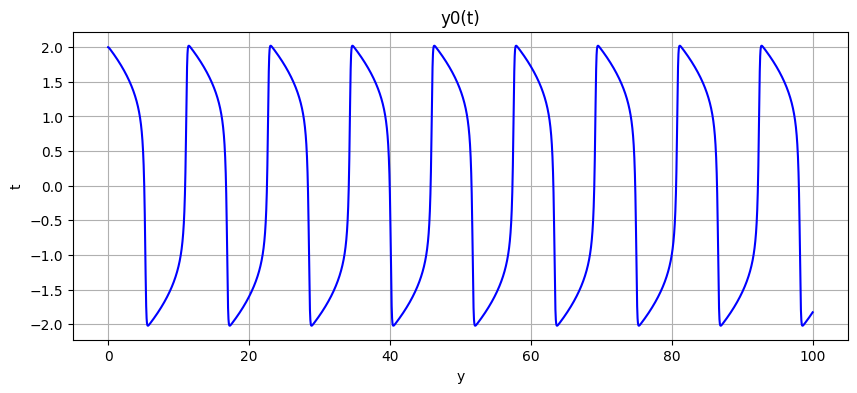

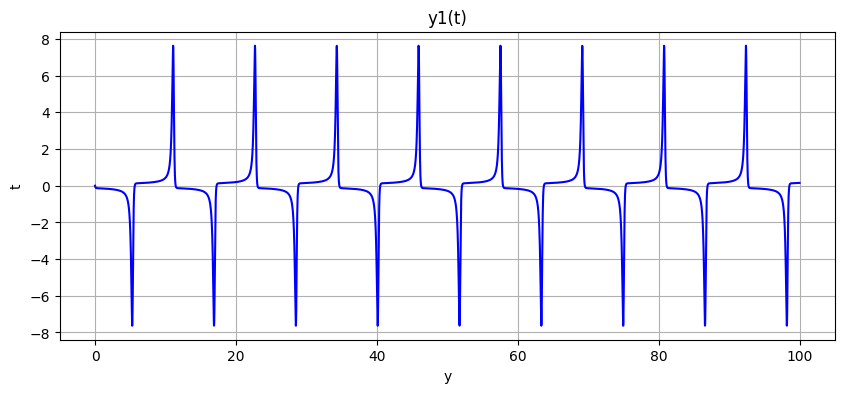

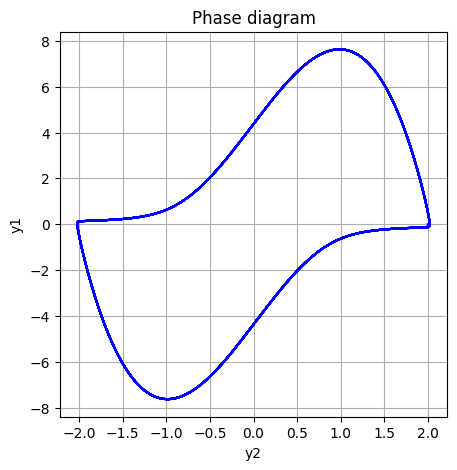

In [51]:
graph(t_a, y_a, 0, 'pictures/fdn_y1.png')
graph(t_a, y_a, 1, 'pictures/fdn_y2.png')

phase_diag(t_a, y_a, 'pictures/fdn_phase.png')

<img src='pictures/fdn_y1.png'>

<img src='pictures/fdn_y2.png'>

<img src='pictures/fdn_phase.png'>

### Исследование поведения в зависимости от шага:

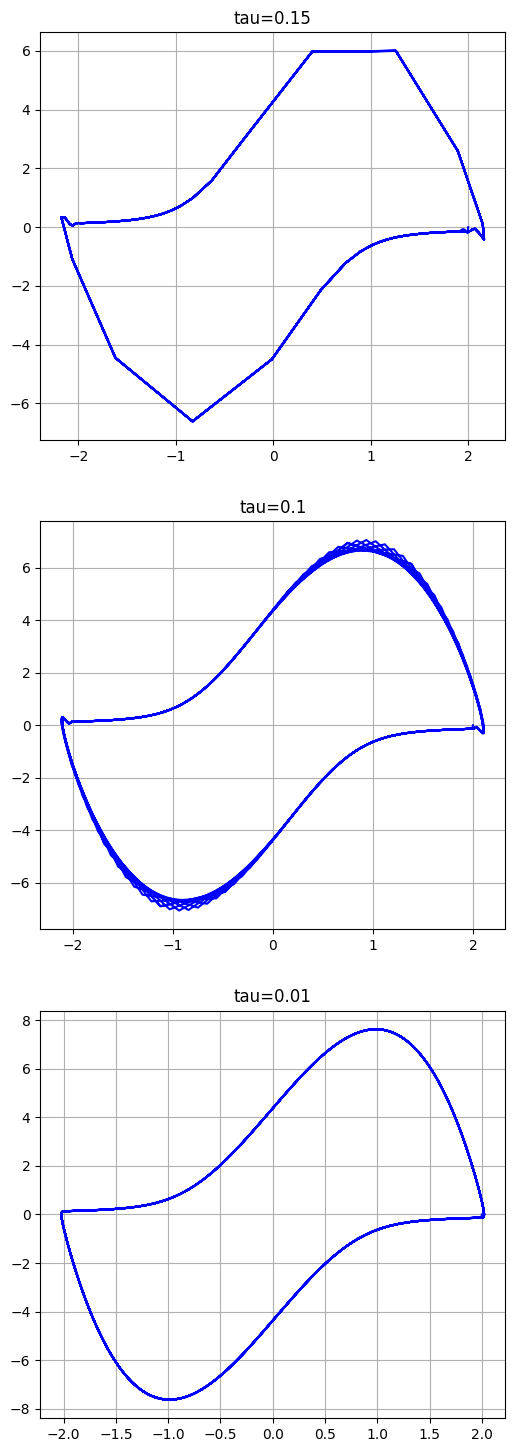

In [52]:
steps = [0.15, 0.1, 0.01, 0.005]
res = [fdn(y0, tau, 100) for tau in steps]

fig, axs = plt.subplots(3, figsize=[6, 18])

ind = 0
for ax in axs.flat:
    ax.plot(res[ind][1][:,0], res[ind][1][:,1], 'b-')
    
    ax.set_title(f"tau={steps[ind]}")
    ax.grid()
    ind += 1

plt.savefig('pictures/fdn_steps.png')

<img src='pictures/fdn_steps.png'>